In [7]:
 !pip install numpy pandas datetime pearsonr seaborn matplotlib scikit-learn

In [45]:
import math
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt


# STRUCTURING THE CSV's

In [46]:
SBIN=pd.read_csv('../data/historical_stock_data_SBIN.csv')
SBIN

,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
0,2024-06-21,EQ,844.90,848.05,828.60,843.75,834.45,836.30,837.22,912.00,543.20,18990090,1.589888e+10,305592,SBIN
1,2024-06-20,EQ,853.00,853.10,842.35,852.60,844.90,843.75,846.89,912.00,543.20,13985352,1.184411e+10,214049,SBIN
2,2024-06-19,EQ,846.80,860.60,841.00,844.90,854.30,852.60,850.68,912.00,543.20,32925140,2.800865e+10,394742,SBIN
3,2024-06-18,EQ,841.55,851.50,840.25,839.20,845.30,844.90,847.17,912.00,543.20,14929083,1.264751e+10,241973,SBIN
4,2024-06-14,EQ,845.00,849.90,835.10,843.90,839.20,839.20,841.90,912.00,543.20,12903496,1.086344e+10,206549,SBIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,2021-01-07,EQ,289.00,291.80,287.00,285.05,288.00,287.70,289.15,337.95,149.45,30546600,8.832502e+09,183684,SBIN
856,2021-01-06,EQ,283.00,289.15,281.40,281.75,283.90,285.05,285.76,337.95,149.45,40765708,1.164907e+10,224327,SBIN
857,2021-01-05,EQ,278.05,282.45,277.00,281.05,281.40,281.75,279.69,337.95,149.45,27393072,7.661574e+09,155149,SBIN
858,2021-01-04,EQ,281.85,283.90,277.75,279.40,281.10,281.05,281.41,337.95,149.45,31450608,8.850464e+09,171760,SBIN


In [14]:
AXIS=pd.read_csv('../data/historical_stock_data_AXISBANK.csv')
AXIS


,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
0,2024-06-21,EQ,1246.00,1246.00,1223.75,1239.50,1232.10,1237.45,1229.24,1246.00,927.15,29311314,3.603051e+10,236969,AXISBANK
1,2024-06-20,EQ,1230.10,1241.50,1220.40,1226.65,1238.00,1239.50,1234.40,1243.35,927.15,8206858,1.013058e+10,184564,AXISBANK
2,2024-06-19,EQ,1193.00,1243.35,1185.50,1191.90,1229.00,1226.65,1216.95,1243.35,927.15,17987437,2.188987e+10,338098,AXISBANK
3,2024-06-18,EQ,1194.00,1194.00,1181.15,1181.05,1190.00,1191.90,1188.94,1242.20,927.15,6837181,8.128978e+09,166191,AXISBANK
4,2024-06-14,EQ,1180.95,1184.65,1170.00,1174.65,1181.00,1181.05,1178.90,1242.20,927.15,4451031,5.247312e+09,175362,AXISBANK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,2021-01-07,EQ,659.00,676.50,659.00,654.25,670.10,671.10,668.78,760.70,286.00,17887570,1.196294e+10,203566,AXISBANK
856,2021-01-06,EQ,662.00,667.15,649.15,664.45,651.55,654.25,659.35,760.70,286.00,20829645,1.373394e+10,232735,AXISBANK
857,2021-01-05,EQ,618.00,667.90,618.00,624.70,664.15,664.45,649.82,760.70,286.00,37973963,2.467637e+10,393175,AXISBANK
858,2021-01-04,EQ,627.80,633.00,621.30,623.80,625.75,624.70,626.37,760.70,286.00,14068156,8.811802e+09,140952,AXISBANK


In [15]:
HDFC=pd.read_csv('../data/historical_stock_data_HDFCBANK.csv')
HDFC

,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
0,2024-06-21,EQ,1672.85,1672.85,1643.15,1669.35,1661.65,1665.75,1658.68,1757.5,1363.55,25815388,4.281944e+10,408577,HDFCBANK
1,2024-06-20,EQ,1669.80,1681.45,1652.00,1657.85,1667.25,1669.35,1667.89,1757.5,1363.55,20704371,3.453260e+10,465827,HDFCBANK
2,2024-06-19,EQ,1613.40,1669.90,1604.00,1607.80,1657.00,1657.85,1644.44,1757.5,1363.55,45065598,7.410759e+10,709705,HDFCBANK
3,2024-06-18,EQ,1596.90,1610.50,1589.45,1596.90,1608.00,1607.80,1604.04,1757.5,1363.55,16207857,2.599807e+10,353540,HDFCBANK
4,2024-06-14,EQ,1584.00,1599.00,1577.70,1580.75,1595.60,1596.90,1592.12,1757.5,1363.55,12770277,2.033187e+10,320179,HDFCBANK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,2021-01-07,EQ,1432.50,1432.60,1412.55,1420.55,1416.90,1416.25,1422.34,1464.4,738.75,9947421,1.414862e+10,127305,HDFCBANK
856,2021-01-06,EQ,1435.00,1440.00,1413.10,1426.70,1419.80,1420.55,1423.55,1464.4,738.75,11067025,1.575451e+10,151854,HDFCBANK
857,2021-01-05,EQ,1419.20,1430.75,1409.00,1416.00,1425.85,1426.70,1419.93,1464.4,738.75,7193412,1.021416e+10,186611,HDFCBANK
858,2021-01-04,EQ,1438.00,1438.00,1399.00,1425.05,1422.25,1416.00,1417.20,1464.4,738.75,7870096,1.115347e+10,177576,HDFCBANK


# Table Concatination

In [22]:
concatenated_df = pd.concat([HDFC, AXIS, SBIN], axis=0)

concatenated_df


,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
0,2024-06-21,EQ,1672.85,1672.85,1643.15,1669.35,1661.65,1665.75,1658.68,1757.50,1363.55,25815388,4.281944e+10,408577,HDFCBANK
1,2024-06-20,EQ,1669.80,1681.45,1652.00,1657.85,1667.25,1669.35,1667.89,1757.50,1363.55,20704371,3.453260e+10,465827,HDFCBANK
2,2024-06-19,EQ,1613.40,1669.90,1604.00,1607.80,1657.00,1657.85,1644.44,1757.50,1363.55,45065598,7.410759e+10,709705,HDFCBANK
3,2024-06-18,EQ,1596.90,1610.50,1589.45,1596.90,1608.00,1607.80,1604.04,1757.50,1363.55,16207857,2.599807e+10,353540,HDFCBANK
4,2024-06-14,EQ,1584.00,1599.00,1577.70,1580.75,1595.60,1596.90,1592.12,1757.50,1363.55,12770277,2.033187e+10,320179,HDFCBANK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,2021-01-07,EQ,659.00,676.50,659.00,654.25,670.10,671.10,668.78,760.70,286.00,17887570,1.196294e+10,203566,AXISBANK
856,2021-01-06,EQ,662.00,667.15,649.15,664.45,651.55,654.25,659.35,760.70,286.00,20829645,1.373394e+10,232735,AXISBANK
857,2021-01-05,EQ,618.00,667.90,618.00,624.70,664.15,664.45,649.82,760.70,286.00,37973963,2.467637e+10,393175,AXISBANK
858,2021-01-04,EQ,627.80,633.00,621.30,623.80,625.75,624.70,626.37,760.70,286.00,14068156,8.811802e+09,140952,AXISBANK


# First Five

In [23]:
AXIS.head()

,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
0,2024-06-21,EQ,1246.00,1246.00,1223.75,1239.50,1232.1,1237.45,1229.24,1246.00,927.15,29311314,3.603051e+10,236969,AXISBANK
1,2024-06-20,EQ,1230.10,1241.50,1220.40,1226.65,1238.0,1239.50,1234.40,1243.35,927.15,8206858,1.013058e+10,184564,AXISBANK
2,2024-06-19,EQ,1193.00,1243.35,1185.50,1191.90,1229.0,1226.65,1216.95,1243.35,927.15,17987437,2.188987e+10,338098,AXISBANK
3,2024-06-18,EQ,1194.00,1194.00,1181.15,1181.05,1190.0,1191.90,1188.94,1242.20,927.15,6837181,8.128978e+09,166191,AXISBANK
4,2024-06-14,EQ,1180.95,1184.65,1170.00,1174.65,1181.0,1181.05,1178.90,1242.20,927.15,4451031,5.247312e+09,175362,AXISBANK


In [24]:
HDFC.head()


,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
0,2024-06-21,EQ,1672.85,1672.85,1643.15,1669.35,1661.65,1665.75,1658.68,1757.5,1363.55,25815388,4.281944e+10,408577,HDFCBANK
1,2024-06-20,EQ,1669.80,1681.45,1652.00,1657.85,1667.25,1669.35,1667.89,1757.5,1363.55,20704371,3.453260e+10,465827,HDFCBANK
2,2024-06-19,EQ,1613.40,1669.90,1604.00,1607.80,1657.00,1657.85,1644.44,1757.5,1363.55,45065598,7.410759e+10,709705,HDFCBANK
3,2024-06-18,EQ,1596.90,1610.50,1589.45,1596.90,1608.00,1607.80,1604.04,1757.5,1363.55,16207857,2.599807e+10,353540,HDFCBANK
4,2024-06-14,EQ,1584.00,1599.00,1577.70,1580.75,1595.60,1596.90,1592.12,1757.5,1363.55,12770277,2.033187e+10,320179,HDFCBANK


In [25]:
SBIN.head()


,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
0,2024-06-21,EQ,1246.00,1246.00,1223.75,1239.50,1232.1,1237.45,1229.24,1246.00,927.15,29311314,3.603051e+10,236969,AXISBANK
1,2024-06-20,EQ,1230.10,1241.50,1220.40,1226.65,1238.0,1239.50,1234.40,1243.35,927.15,8206858,1.013058e+10,184564,AXISBANK
2,2024-06-19,EQ,1193.00,1243.35,1185.50,1191.90,1229.0,1226.65,1216.95,1243.35,927.15,17987437,2.188987e+10,338098,AXISBANK
3,2024-06-18,EQ,1194.00,1194.00,1181.15,1181.05,1190.0,1191.90,1188.94,1242.20,927.15,6837181,8.128978e+09,166191,AXISBANK
4,2024-06-14,EQ,1180.95,1184.65,1170.00,1174.65,1181.0,1181.05,1178.90,1242.20,927.15,4451031,5.247312e+09,175362,AXISBANK


In [25]:
SBIN.head()


,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
0,2024-06-21,EQ,1246.00,1246.00,1223.75,1239.50,1232.1,1237.45,1229.24,1246.00,927.15,29311314,3.603051e+10,236969,AXISBANK
1,2024-06-20,EQ,1230.10,1241.50,1220.40,1226.65,1238.0,1239.50,1234.40,1243.35,927.15,8206858,1.013058e+10,184564,AXISBANK
2,2024-06-19,EQ,1193.00,1243.35,1185.50,1191.90,1229.0,1226.65,1216.95,1243.35,927.15,17987437,2.188987e+10,338098,AXISBANK
3,2024-06-18,EQ,1194.00,1194.00,1181.15,1181.05,1190.0,1191.90,1188.94,1242.20,927.15,6837181,8.128978e+09,166191,AXISBANK
4,2024-06-14,EQ,1180.95,1184.65,1170.00,1174.65,1181.0,1181.05,1178.90,1242.20,927.15,4451031,5.247312e+09,175362,AXISBANK


In [25]:
SBIN.head()


,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL
0,2024-06-21,EQ,1246.00,1246.00,1223.75,1239.50,1232.1,1237.45,1229.24,1246.00,927.15,29311314,3.603051e+10,236969,AXISBANK
1,2024-06-20,EQ,1230.10,1241.50,1220.40,1226.65,1238.0,1239.50,1234.40,1243.35,927.15,8206858,1.013058e+10,184564,AXISBANK
2,2024-06-19,EQ,1193.00,1243.35,1185.50,1191.90,1229.0,1226.65,1216.95,1243.35,927.15,17987437,2.188987e+10,338098,AXISBANK
3,2024-06-18,EQ,1194.00,1194.00,1181.15,1181.05,1190.0,1191.90,1188.94,1242.20,927.15,6837181,8.128978e+09,166191,AXISBANK
4,2024-06-14,EQ,1180.95,1184.65,1170.00,1174.65,1181.0,1181.05,1178.90,1242.20,927.15,4451031,5.247312e+09,175362,AXISBANK


# Shape

In [26]:
AXIS.shape


(860, 15)

In [27]:
HDFC.shape

(860, 15)

In [28]:
SBIN.shape

(860, 15)

# Descriptive Analysis

In [30]:
AXIS.describe()


,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES
count,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,8.600000e+02,8.600000e+02,860.000000
mean,855.265000,864.633256,845.339302,854.424884,855.083314,855.142326,855.071453,935.925116,604.876105,1.075942e+07,9.088112e+09,192487.424419
std,150.923297,151.778313,150.241715,150.753484,151.118037,151.106442,150.837032,125.429105,165.907682,6.480249e+06,5.441883e+09,84268.820579
min,618.000000,625.450000,616.000000,620.450000,623.400000,623.800000,622.150000,760.700000,286.000000,1.697570e+05,1.936923e+08,5380.000000
25%,734.075000,744.000000,724.412500,733.237500,734.912500,733.662500,733.830000,866.900000,568.400000,6.824317e+06,5.746819e+09,140174.750000
50%,806.300000,815.975000,795.500000,803.975000,804.575000,804.450000,806.460000,866.900000,618.250000,9.088820e+06,7.809861e+09,175493.500000
75%,974.062500,983.362500,963.187500,973.312500,974.150000,973.675000,973.067500,990.000000,707.700000,1.268940e+07,1.076231e+10,221273.500000
max,1246.000000,1246.000000,1223.750000,1239.500000,1238.000000,1239.500000,1234.400000,1246.000000,927.150000,6.430398e+07,5.154228e+10,932878.000000


In [31]:
HDFC.describe()


,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES
count,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,8.600000e+02,8.600000e+02,8.600000e+02
mean,1523.804244,1537.360291,1510.268547,1523.629186,1524.169709,1523.895988,1523.977512,1711.140814,1225.636570,1.207803e+07,1.851888e+10,2.618411e+05
std,96.524839,95.707632,96.237667,95.582654,95.457668,95.658811,95.697454,54.133915,199.236056,9.666811e+06,1.508101e+10,1.595177e+05
min,1275.000000,1296.400000,1271.600000,1281.300000,1279.450000,1281.300000,1282.590000,1464.400000,738.750000,5.285570e+05,7.746360e+08,1.599500e+04
25%,1453.287500,1466.887500,1440.562500,1454.375000,1456.300000,1454.587500,1454.527500,1722.100000,1271.600000,6.009498e+06,8.903962e+09,1.650095e+05
50%,1518.500000,1529.900000,1505.000000,1518.000000,1517.475000,1518.200000,1519.255000,1725.000000,1271.600000,9.098806e+06,1.388136e+10,2.202855e+05
75%,1604.362500,1614.650000,1590.100000,1604.037500,1605.100000,1604.212500,1602.295000,1757.500000,1363.550000,1.554611e+07,2.392686e+10,3.172780e+05
max,1723.450000,1757.500000,1713.800000,1728.200000,1729.000000,1728.200000,1733.310000,1757.500000,1460.250000,8.670560e+07,1.439861e+11,2.098772e+06


In [32]:
AXIS.describe()


,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES
count,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,8.600000e+02,8.600000e+02,860.000000
mean,855.265000,864.633256,845.339302,854.424884,855.083314,855.142326,855.071453,935.925116,604.876105,1.075942e+07,9.088112e+09,192487.424419
std,150.923297,151.778313,150.241715,150.753484,151.118037,151.106442,150.837032,125.429105,165.907682,6.480249e+06,5.441883e+09,84268.820579
min,618.000000,625.450000,616.000000,620.450000,623.400000,623.800000,622.150000,760.700000,286.000000,1.697570e+05,1.936923e+08,5380.000000
25%,734.075000,744.000000,724.412500,733.237500,734.912500,733.662500,733.830000,866.900000,568.400000,6.824317e+06,5.746819e+09,140174.750000
50%,806.300000,815.975000,795.500000,803.975000,804.575000,804.450000,806.460000,866.900000,618.250000,9.088820e+06,7.809861e+09,175493.500000
75%,974.062500,983.362500,963.187500,973.312500,974.150000,973.675000,973.067500,990.000000,707.700000,1.268940e+07,1.076231e+10,221273.500000
max,1246.000000,1246.000000,1223.750000,1239.500000,1238.000000,1239.500000,1234.400000,1246.000000,927.150000,6.430398e+07,5.154228e+10,932878.000000


# Quick Summery

In [33]:
AXIS.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          860 non-null    object 
 1   SERIES        860 non-null    object 
 2   OPEN          860 non-null    float64
 3   HIGH          860 non-null    float64
 4   LOW           860 non-null    float64
 5   PREV. CLOSE   860 non-null    float64
 6   LTP           860 non-null    float64
 7   CLOSE         860 non-null    float64
 8   VWAP          860 non-null    float64
 9   52W H         860 non-null    float64
 10  52W L         860 non-null    float64
 11  VOLUME        860 non-null    int64  
 12  VALUE         860 non-null    float64
 13  NO OF TRADES  860 non-null    int64  
 14  SYMBOL        860 non-null    object 
dtypes: float64(10), int64(2), object(3)
memory usage: 100.9+ KB


In [34]:
HDFC.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          860 non-null    object 
 1   SERIES        860 non-null    object 
 2   OPEN          860 non-null    float64
 3   HIGH          860 non-null    float64
 4   LOW           860 non-null    float64
 5   PREV. CLOSE   860 non-null    float64
 6   LTP           860 non-null    float64
 7   CLOSE         860 non-null    float64
 8   VWAP          860 non-null    float64
 9   52W H         860 non-null    float64
 10  52W L         860 non-null    float64
 11  VOLUME        860 non-null    int64  
 12  VALUE         860 non-null    float64
 13  NO OF TRADES  860 non-null    int64  
 14  SYMBOL        860 non-null    object 
dtypes: float64(10), int64(2), object(3)
memory usage: 100.9+ KB


In [35]:
SBIN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          860 non-null    object 
 1   SERIES        860 non-null    object 
 2   OPEN          860 non-null    float64
 3   HIGH          860 non-null    float64
 4   LOW           860 non-null    float64
 5   PREV. CLOSE   860 non-null    float64
 6   LTP           860 non-null    float64
 7   CLOSE         860 non-null    float64
 8   VWAP          860 non-null    float64
 9   52W H         860 non-null    float64
 10  52W L         860 non-null    float64
 11  VOLUME        860 non-null    int64  
 12  VALUE         860 non-null    float64
 13  NO OF TRADES  860 non-null    int64  
 14  SYMBOL        860 non-null    object 
dtypes: float64(10), int64(2), object(3)
memory usage: 100.9+ KB


# Historical Closing Price visualisation


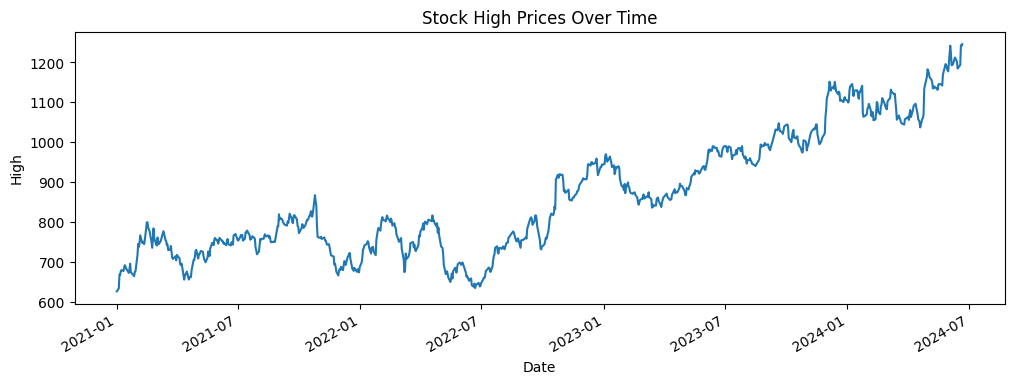

In [39]:
AXIS['DATE'] = pd.to_datetime(df['DATE'])
AXIS.set_index('DATE', inplace=True)


ax = AXIS["HIGH"].plot(figsize=(12, 4))
ax.set_xlabel("Date")
ax.set_ylabel("High")
ax.set_title("Stock High Prices Over Time")


plt.show()

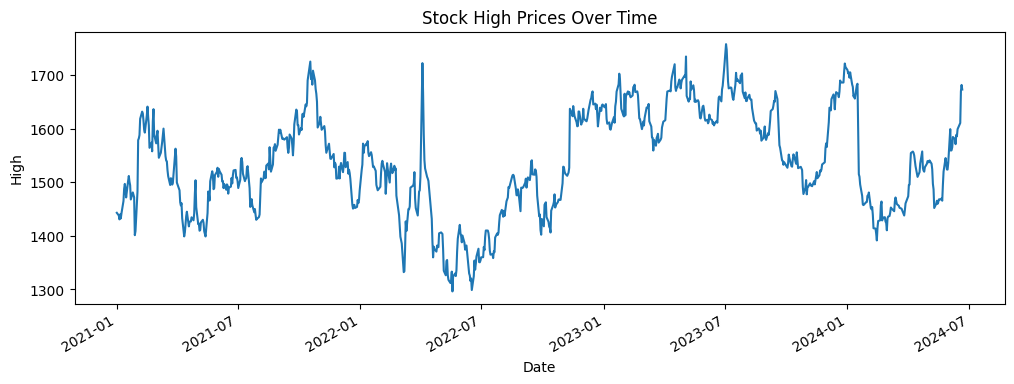

In [41]:
HDFC['DATE'] = pd.to_datetime(df['DATE'])
HDFC.set_index('DATE', inplace=True)


ax = HDFC["HIGH"].plot(figsize=(12, 4))
ax.set_xlabel("Date")
ax.set_ylabel("High")
ax.set_title("Stock High Prices Over Time")


plt.show()

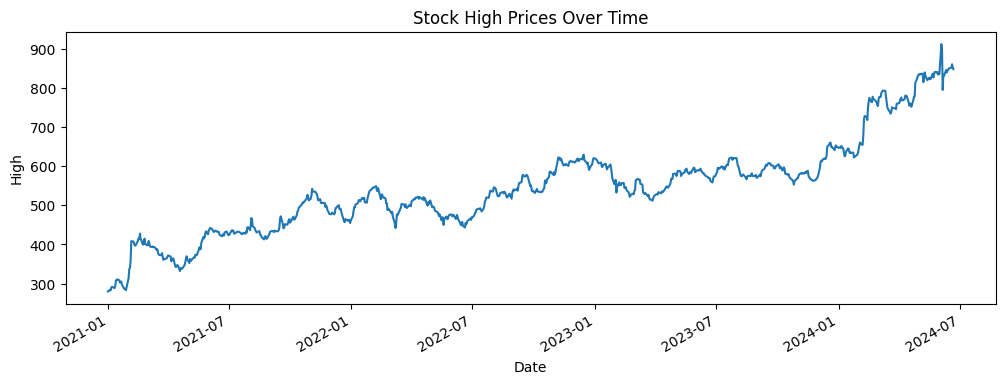

In [52]:
SBIN['DATE'] = pd.to_datetime(df['DATE'])
SBIN.set_index('DATE', inplace=True)


ax = SBIN["HIGH"].plot(figsize=(12, 4))
ax.set_xlabel("Date")
ax.set_ylabel("High")
ax.set_title("Stock High Prices Over Time")


plt.show()

# The total volume of stocks being traded from 2021 to 2024

<Axes: xlabel='DATE'>

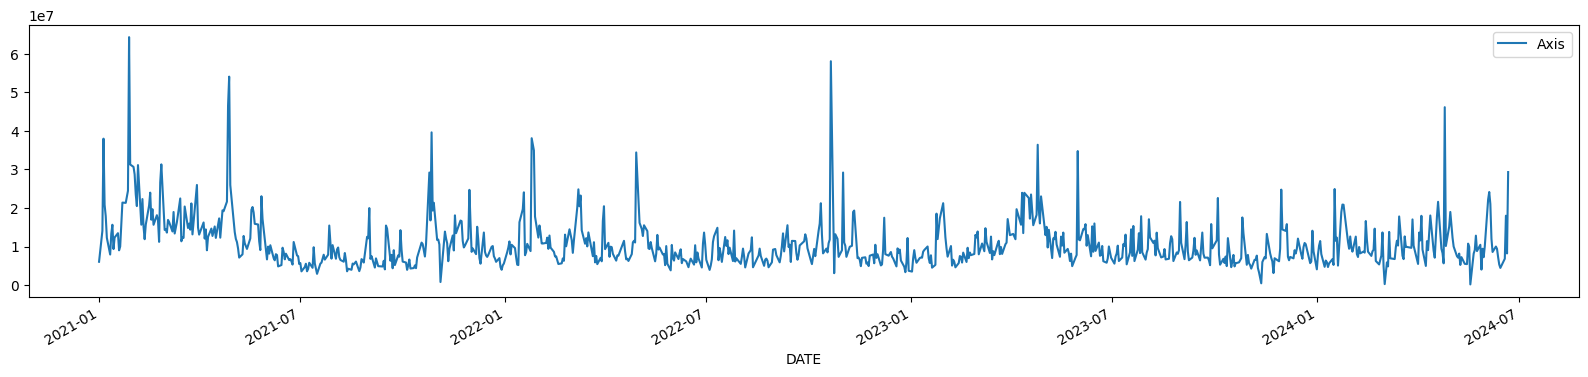

In [48]:
AXIS['VOLUME'].plot(legend = True, figsize = (20,4), label="Axis")


<Axes: xlabel='DATE'>

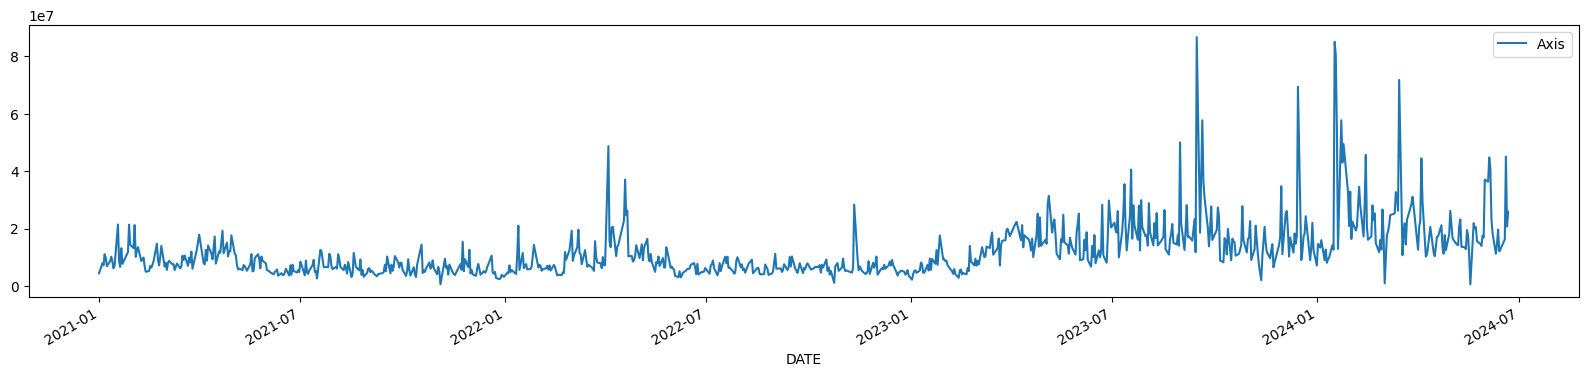

In [49]:
HDFC['VOLUME'].plot(legend = True, figsize = (20,4), label="Axis")


<Axes: xlabel='DATE'>

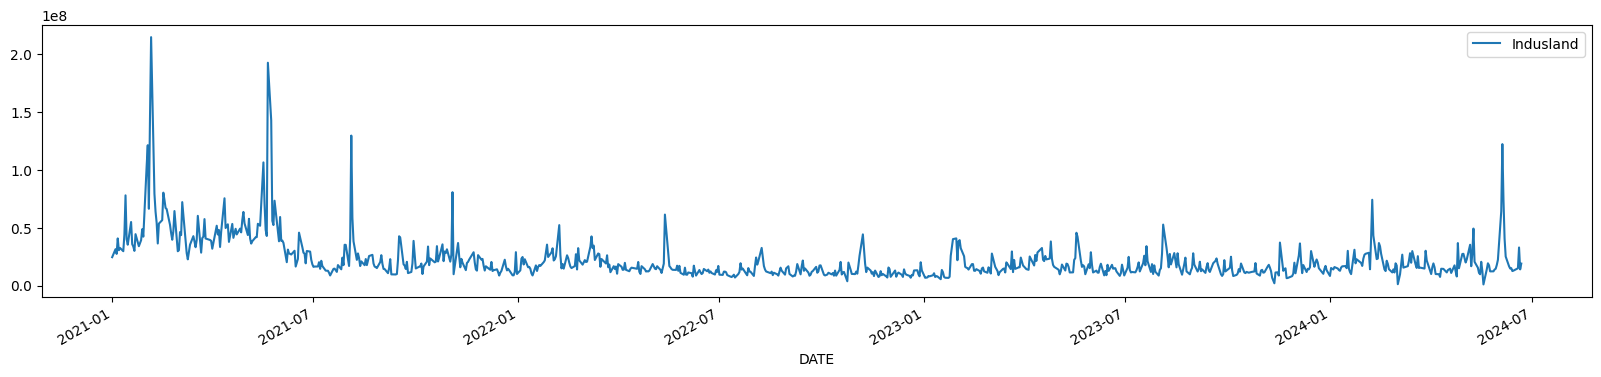

In [53]:
SBIN['VOLUME'].plot(legend = True, figsize = (20,4), label="Indusland")


# 1.2 Moving Averages

# 1.1.1  Calculating the Simple Moving Average of Axis Bank Stock;
"""A SMA tells us the unweighted mean of the previous K data points,
The more the value of K the more smooth is the curve, but increasing K decreases accuracy.
If the data points are p1,  p2, . . . , pn then we calculate the simple moving average."""

In [59]:
AXIS_SMA = AXIS['CLOSE'].to_frame()
AXIS_SMA['SMA30'] = AXIS['CLOSE'].rolling(30).mean()
AXIS_SMA.dropna(inplace=True)
AXIS_SMA

,CLOSE,SMA30
DATE,,
2024-05-10,1120.10,1170.721667
2024-05-09,1115.65,1166.661667
2024-05-08,1128.65,1162.966667
2024-05-07,1127.70,1159.668333
2024-05-06,1143.65,1158.060000
...,...,...
2021-01-07,671.10,703.988333
2021-01-06,654.25,699.896667
2021-01-05,664.45,696.120000


<Axes: xlabel='DATE'>

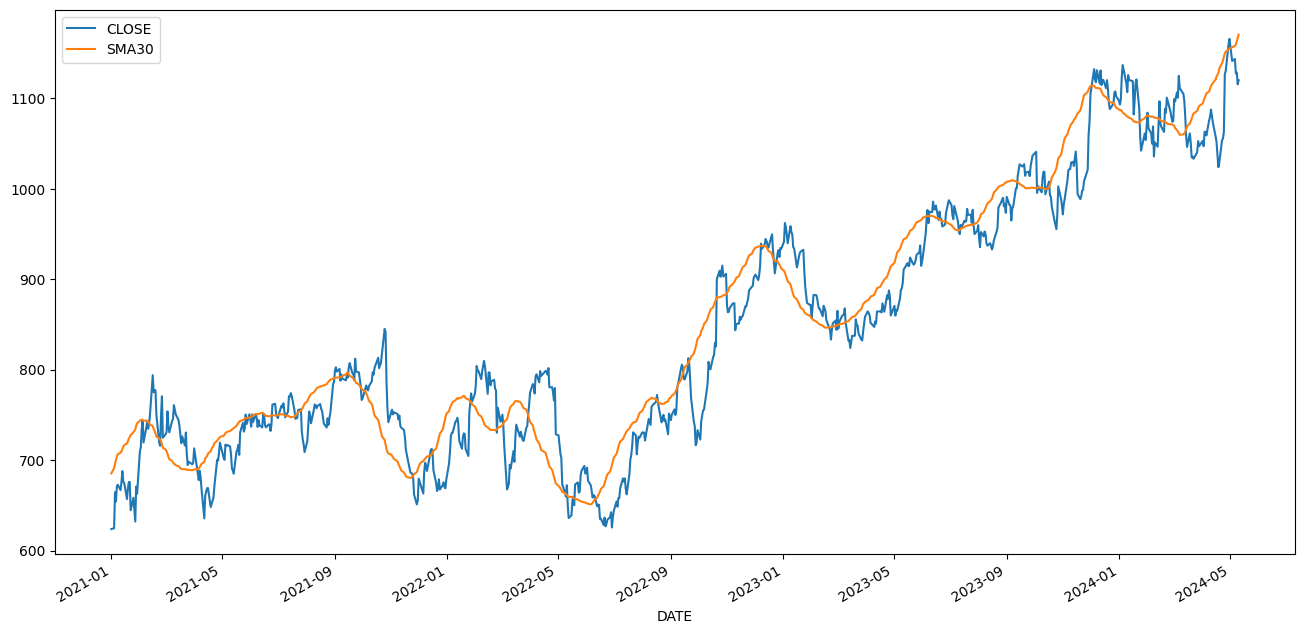

In [60]:
AXIS_SMA[['CLOSE','SMA30']].plot(label='Axis Bank',
                                figsize=(16,8))

# 1.1.2  Calculating the Cumulative Moving Average of Axis Bank Stock;
"""
CMA is the mean of all the previous values up to the current value.
CMA of dataPoints x1, x2 …..  at time t can be calculated as,
the summation of all x's divided by time t
"""

In [62]:
AXIS_CMA = AXIS['CLOSE'].to_frame()
AXIS_CMA['CMA30'] = AXIS['CLOSE'].expanding().mean()
AXIS_CMA

,CLOSE,CMA30
DATE,,
2024-06-21,1237.45,1237.450000
2024-06-20,1239.50,1238.475000
2024-06-19,1226.65,1234.533333
2024-06-18,1191.90,1223.875000
2024-06-14,1181.05,1215.310000
...,...,...
2021-01-07,671.10,856.139252
2021-01-06,654.25,855.903676
2021-01-05,664.45,855.680536


<Axes: xlabel='DATE'>

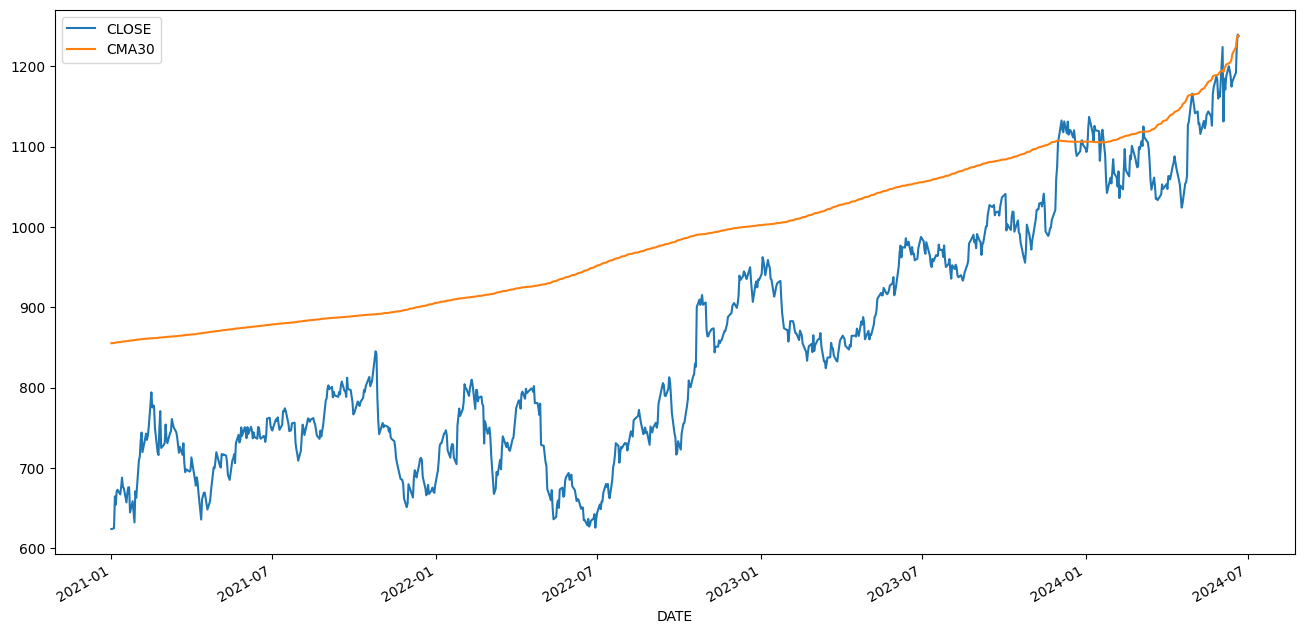

In [63]:
AXIS_CMA[['CLOSE','CMA30']].plot(label='Axis Bank',
                                 figsize=(16,8))

# 1.1.3  Calculating Exponential Moving Average of Axis Bank Stocks;
"""
EMA tells us the weighted mean of the previous K data points.
EMA places a greater weight and significance on the most recent data points.
"""